In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [3]:
PATH_DATASET_DAILY = '../../data/prepared/bicimad_daily.csv'
dataset_daily = pd.read_csv(PATH_DATASET_DAILY)

In [7]:
dataset_daily.head(2)

,day_of_week,rides,tmed,prec,velmedia
0,Sat,9762,27.3,0.0,1.1
1,Sun,9882,27.5,1.2,1.7


In [13]:
weekday_dict = {
    'Mon': 0,
    'Tue': 0,
    'Wed': 0,
    'Thu': 0,
    'Fri': 0,
    'Sat': 1,
    'Sun': 1
}

In [14]:
dataset_daily['weekday'] = dataset_daily['day_of_week'].map(weekday_dict)

In [27]:
from sklearn.model_selection import train_test_split

target = 'rides'
categorical = ['day_of_week', 'weekday']
dataset_daily_2 = pd.get_dummies(dataset_daily, columns=categorical)
dataset_daily_3 = dataset_daily_2[['rides', 'tmed', 'prec', 'velmedia', 'weekday_0', 'weekday_1']]
train, test = train_test_split(dataset_daily_3, test_size=0.3)
features = ['velmedia', 'tmed', 'prec', 'weekday_0', 'weekday_1']

In [29]:
train[features].head()

,velmedia,tmed,prec,weekday_0,weekday_1
10,1.9,23.0,0.0,1,0
9,1.9,22.8,0.0,1,0
22,1.4,27.2,0.0,0,1
16,1.9,24.7,1.2,1,0
26,0.3,21.0,0.0,1,0


In [26]:
lr = linear_model.LinearRegression()
lr

LinearRegression()

In [30]:
lr.fit(train[features], train[target])

LinearRegression()

In [31]:
lr.score(train[features], train[target])

0.2884342852577437

In [34]:
import math

predictions = lr.predict(test[features])
rmse=math.sqrt(metrics.mean_squared_error(test[target],predictions))
mae=metrics.mean_absolute_error(test[target],predictions)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 2023.7403243544632
Mean absolute error : 1781.3893927938673


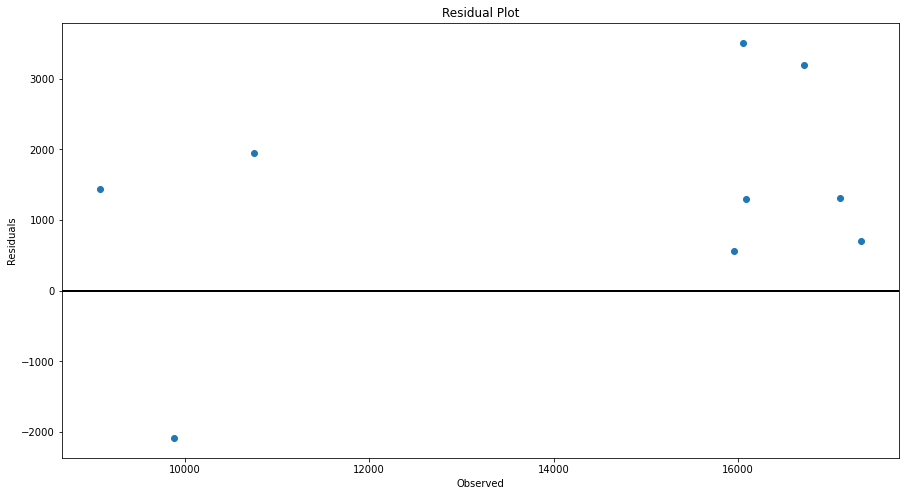

In [35]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(test[target], test[target]-predictions)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

In [ ]:
lr.predict(test[features])

In [18]:
categorical = ['day_of_week', 'weekday']

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [37]:
dtr.fit(train[features], train[target])

DecisionTreeRegressor(max_leaf_nodes=10)

In [38]:
dtr.score(train[features], train[target])

0.9937800528279194

In [45]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

ModuleNotFoundError: No module named 'graphviz'

In [40]:
predictions = dtr.predict(test[features])
rmse=math.sqrt(metrics.mean_squared_error(test[target],predictions))
mae=metrics.mean_absolute_error(test[target],predictions)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 1112.5036641637535
Mean absolute error : 785.6111111111111


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)
rf.fit(train[features], train[target])

RandomForestRegressor(n_estimators=200)

In [44]:
rf.score(train[features], train[target])

0.8324618693599496